In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [8]:
data = loadmat('D:/ProgrammingBook/AndrewNg/ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [9]:
X = data['X']
y = data['y']
X.shape, y.shape

((5000, 400), (5000, 1))

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
y_onehot.shape

C:\tools\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(5000, 10)

In [16]:
np.unique(data['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

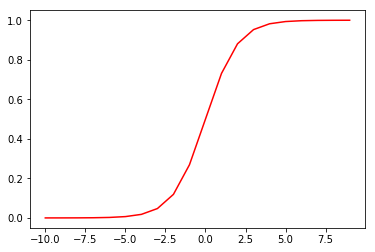

In [18]:
example_x = np.arange(-10,10, step=1)
example_y = sigmoid(example_x)
plt.plot(example_x, example_y, c='r')
plt.show()

In [19]:
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    a1 = np.insert(X, 0, values = np.ones(m), axis = 1)
    z2 = a1*theta1.T #这里是矩阵乘法，*在矩阵上是矩阵乘法，如果是数组的话就是按元素相乘
    a2 = np.insert(sigmoid(z2), 0, values = np.ones(m), axis = 1)
    z3 = a2*theta2.T
    h = sigmoid(z3)
    return a1, z2, a2, z3, h

In [24]:
def cost(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    theta1 = np.matrix(np.reshape(params[:hidden_size*(input_size+1)],
                                 (hidden_size, input_size+1)))
    theta2 = np.matrix(np.reshape(params[hidden_size*(input_size+1):],
                                 (num_labels, hidden_size+1)))
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:],np.log(h[i,:]))
        second_term = np.multiply((1-y[i,:]), np.log(1-h[i,:]))
        J += np.sum(first_term-second_term)
    J = J/m
    #regularized term
    J+=(float(learning_rate)/(2*m))*(np.sum(np.power(theta1[:,1:],2))
                                    +np.sum(np.power(theta2[:,1:],2)))
    return J

In [21]:
input_size = 400
hidden_size = 25
num_labels = 10
learning_rate = 1

params = (np.random.random(size = hidden_size*(input_size+1)+num_labels*(hidden_size+1))-0.5)*0.25
m = X.shape[0]
X = np.matrix(X)
y = np.matrix(y)

theta1 = np.matrix(np.reshape(params[:hidden_size*(input_size+1)],
                             (hidden_size, input_size+1)))
theta2 = np.matrix(np.reshape(params[hidden_size*(input_size+1):],
                             (num_labels, hidden_size+1)))
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [22]:
a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
a1.shape, z2.shape, a2.shape, z3.shape, h.shape

((5000, 401), (5000, 25), (5000, 26), (5000, 10), (5000, 10))

In [27]:
cost(params, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)

7.3251151159602745

In [28]:
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), (1-sigmoid(z)))

In [51]:
def backprop(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    theta1 = np.matrix(np.reshape(params[:hidden_size*(input_size+1)],
                                 (hidden_size, input_size+1)))
    theta2 = np.matrix(np.reshape(params[hidden_size*(input_size+1):],
                                 (num_labels, hidden_size+1)))
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    J = 0
    delta1 = np.zeros(theta1.shape)
    delta2 = np.zeros(theta2.shape)
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1-y[i,:]), np.log(1-h[i,:]))
        J+=np.sum(first_term-second_term)
    J = J/m
    J += (float(learning_rate)/(2*m))*(np.sum(np.power(theta1[:,1:],2))+np.sum(np.power(theta2[:,1:],2)))
    
    for t in range(m):
        a1t = a1[t,:]
        z2t = z2[t,:]
        a2t = a2[t,:]
        z3t = z3[t,:]
        ht = h[t,:]
        yt = y[t,:]
        
        d3t = np.multiply((ht-yt), sigmoid_gradient(z3t))
        #d3t = ht-yt
        z2t = np.insert(z2t, 0, values = np.ones(1),axis=1)
        d2t = np.multiply((theta2.T*d3t.T).T, sigmoid_gradient(z2t))
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
    delta1 = delta1/m
    delta2 = delta2/m
        
    delta1[:,1:] = delta1[:,1:]+(theta1[:,1:]*learning_rate)/m
    delta2[:,1:] = delta2[:,1:]+(theta2[:,1:]*learning_rate)/m
        
    grad = np.concatenate((np.ravel(delta1),np.ravel(delta2)))
        
    return J, grad

In [52]:
J, grad = backprop(params, input_size, hidden_size, num_labels,X, y_onehot, learning_rate)
J, grad.shape

(7.3251151159602745, (10285,))

In [53]:
from scipy.optimize import minimize
fmin = minimize(fun = backprop, x0 =params,
               args = (input_size, hidden_size, num_labels,
                      X, y_onehot, learning_rate),
               method='TNC', jac=True, options = {'maxiter':250})
fmin

     fun: 0.6416748982368612
     jac: array([2.92320559e-05, 1.63504177e-07, 1.61079017e-07, ...,
       8.53667627e-06, 1.74760317e-05, 1.81897548e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 250
     nit: 20
  status: 3
 success: False
       x: array([ 3.40300409e-02,  8.17520887e-04,  8.05395083e-04, ...,
       -2.57694335e-01, -8.44094066e-01,  1.15150575e+00])

In [54]:
X = np.matrix(X)
theta1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
y_pred = np.array(np.argmax(h, axis=1) + 1)
y_pred

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [55]:
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 95.92%
